In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Load data
data_2019 = pd.read_csv(f'{dir}mibici/2019.csv')
data = data_2019[data_2019['Inicio_del_viaje'].str.startswith('2019-01')]
del data_2019

In [14]:
def count_trips_mibici(data_user):
    viajes_user = data_user.groupby([data_user[['Origen_Id', 'Destino_Id']].min(axis=1), data_user[['Origen_Id', 'Destino_Id']].max(axis=1)]).size().reset_index(name='counts')
    viajes_user.columns = ['Est_A', 'Est_B', 'counts']
    total = viajes_user['counts'].sum()
    viajes_user['prob'] = viajes_user['counts']/total
    return viajes_user

In [15]:
total_counter = count_trips_mibici(data)
total_counter

,Est_A,Est_B,counts,prob
0,2,2,83,0.000206
1,2,3,59,0.000146
2,2,4,26,0.000064
3,2,5,2,0.000005
4,2,6,23,0.000057
...,...,...,...,...
20702,294,295,7,0.000017
20703,294,296,33,0.000082
20704,295,295,33,0.000082
20705,295,296,26,0.000064


In [16]:
users_counts = data['Usuario_Id'].value_counts()
users = users_counts.index.tolist()

In [59]:
def compute_ps_ce(counter_user, total_counter):
    '''
    args:
    counter_user: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by a specific user
    total_counter: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by all users
    return:
    impurity: float with the impurity
    '''
    impurity = 0
    #print(impurity)
    for i in range(len(counter_user)):
        est_a = counter_user.iloc[i]['Est_A']
        est_b = counter_user.iloc[i]['Est_B']
        prob = counter_user.iloc[i]['prob']
        current_general = total_counter[(total_counter['Est_A'] == est_a) & (total_counter['Est_B'] == est_b)]
        impurity -= np.log(prob) * current_general['prob'].values[0]
        #print(impurity)
    return impurity

In [42]:
def compute_entropy(counter_user):
    '''
    args:
    counter_user: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by a specific user
    total_counter: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by all users
    return:
    entropy: float with the entropy
    '''
    entropy = 0
    for i in range(len(counter_user)):
        prob = counter_user.iloc[i]['prob']
        entropy -= prob * np.log(prob)
    return entropy

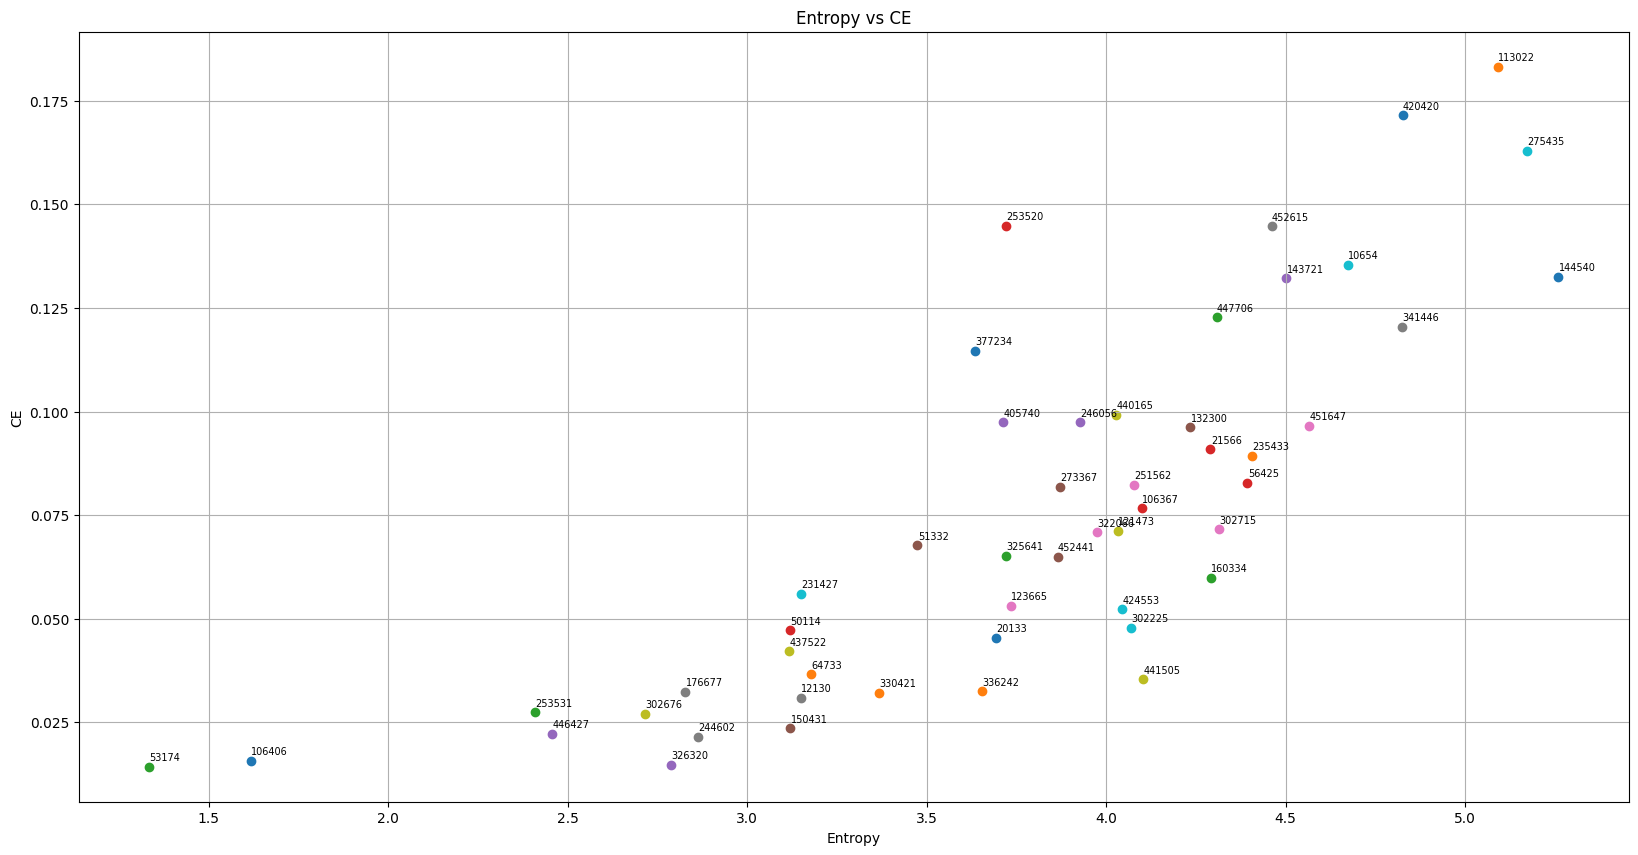

In [60]:
plt.figure(figsize=(20, 10))
for user in users[:50]:
    data_user = data[data['Usuario_Id'] == user]
    counter_user = count_trips_mibici(data_user)
    
    # Calcular la entropía y la impureza de PS para el usuario
    entropy = compute_entropy(counter_user)
    impurity = compute_ps_ce(counter_user, total_counter)
    
    # Graficar el punto del usuario
    plt.scatter(entropy, impurity, label=user)
    plt.text(entropy + 0.001, impurity + 0.001, str(user), fontsize=7, ha='left', va='bottom')  

plt.xlabel('Entropy')
plt.ylabel('CE')
plt.title('Entropy vs CE')
plt.grid()
plt.show()
